In [8]:
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns
import datetime
from lib.utils import year, sem
pd.set_option('display.max_rows',100)


In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Engajamento
Até agora, somente analisamos a estrutura dos ambiente, não o que os estudantes fizeram lá dentro. Como primeiro abordagem, vamos simplesmente contar quantos usuários visualizaram cada módulo (isso é o que o relatório "Atividade do curso" (outline) faz). 


In [26]:
if20 = pd.read_csv('data/nonpublic/mv-2020-IF.csv');if20['ano'] = 2020
if19 = pd.read_csv('data/nonpublic/mv-2019-IF.csv');if19['ano'] = 2019
mvif = pd.concat([if20,if19]);mvif['unidade'] = 'IF'
fea20 = pd.read_csv('data/nonpublic/mv-2020-FEA.csv');fea20['ano'] = 2020
fea19 = pd.read_csv('data/nonpublic/mv-2019-FEA.csv');fea19['ano'] = 2019
mvfea = pd.concat([fea20,fea19]);mvfea['unidade'] = 'FEA'
fd20 = pd.read_csv('data/nonpublic/mv-2020-FD.csv');fd20['ano'] = 2020
fd19 = pd.read_csv('data/nonpublic/mv-2019-FD.csv');fd19['ano'] = 2019
mvfd = pd.concat([fd20,fd19]);mvfd['unidade'] = 'FD'
fmrp20 = pd.read_csv('data/nonpublic/mv-2020-FMRP.csv');fmrp20['ano'] = 2020
fmrp19 = pd.read_csv('data/nonpublic/mv-2019-FMRP.csv');fmrp19['ano'] = 2019
mvfmrp = pd.concat([fmrp20,fmrp19]);mvfmrp['unidade'] = 'FMRP'
mv = pd.concat([mvif,mvfea,mvfd,mvfmrp])

Uma função para filtrar módulos com poucos acessos (labels, sobretudo)

In [33]:
mv.sample(3)

,course,name,cmid,views,uniqusers,courseid,vpu,students,teachers,vps,fracstudents,ano,unidade
10562,69873,resource,2684695,1.0,1.0,69873.0,1.000000,16,4,0.062500,0.062500,2019,FMRP
17272,72900,resource,2735907,0.0,0.0,0.0,0.000000,26,17,0.000000,0.000000,2020,FMRP
13612,71570,quiz,2664405,1132.0,43.0,71570.0,26.325581,44,5,25.727273,0.977273,2019,FMRP


In [187]:
mv.groupby(['ano','unidade'])['cmid'].count()

ano   unidade
2019  FD          9970
      FEA        18459
      FMRP       13884
      IF          3871
2020  FD         17438
      FEA        26454
      FMRP       31015
      IF          7535
Name: cmid, dtype: int64

In [189]:
def filterviews(data,names=[],uulim=5,vlim=10,slim=10):
    df = data[(data['uniqusers'] > uulim) & (data['views'] > vlim) & (data['students'] > slim)].sort_values('fracstudents',ascending=True)
    
    if names:
        df = df[df['name'].isin(names)]
    return df
filterviews(mvfea).ano.value_counts()

2020    18980
2019    12839
Name: ano, dtype: int64

In [191]:
filterviews(mv,['forum','quiz','assign']).groupby(['ano','unidade','name'])['cmid'].count()

ano   unidade  name  
2019  FD       assign     974
               forum      384
               quiz        61
      FEA      assign    1317
               forum      583
               quiz       496
      FMRP     assign     533
               forum      490
               quiz       614
      IF       assign     188
               forum      189
               quiz       568
2020  FD       assign    2048
               forum      659
               quiz       219
      FEA      assign    2428
               forum      817
               quiz      1147
      FMRP     assign    1301
               forum     1178
               quiz      1459
      IF       assign     597
               forum      281
               quiz       581
Name: cmid, dtype: int64

In [75]:
round(2.56,1)

2.6

In [102]:
matr = pd.read_csv('data/processed/matrcurso.csv')
matr.query("ano == 2020 & sglund == 'IF'")

,ano,sem,codclg,codcur,codhab,staalu,codund,sglund,nomcur,nomhab,matr
11958,2020,1,43,43020,101,M,43,IF,Física Bacharelado,Física Bacharelado,9
11959,2020,1,43,43020,101,T,43,IF,Física Bacharelado,Física Bacharelado,3
11960,2020,1,43,43020,104,M,43,IF,Física Bacharelado,Física Bacharelado,15
11961,2020,1,43,43020,104,T,43,IF,Física Bacharelado,Física Bacharelado,3
11962,2020,1,43,43021,101,A,43,IF,Física Bacharelado,Física Bacharelado,4
11963,2020,1,43,43021,101,M,43,IF,Física Bacharelado,Física Bacharelado,313
11964,2020,1,43,43021,101,T,43,IF,Física Bacharelado,Física Bacharelado,22
11965,2020,1,43,43021,104,A,43,IF,Física Bacharelado,Física Bacharelado,8
11966,2020,1,43,43021,104,M,43,IF,Física Bacharelado,Física Bacharelado,403
11967,2020,1,43,43021,104,R,43,IF,Física Bacharelado,Física Bacharelado,3


In [124]:
matrporunidade = matr.query("ano == 2020 & sem == 1").groupby('sglund')['matr'].sum()
matrporunidade['FD']

2542

In [173]:
modules = ['forum','quiz','assign']
#modules = None

In [182]:
fracpm = filterviews(mv,modules).groupby(['ano','unidade'])['fracstudents'].median()
fracpm.apply(round,args=(2,))

ano   unidade
2019  FD         0.41
      FEA        0.69
      FMRP       0.58
      IF         0.43
2020  FD         0.57
      FEA        0.77
      FMRP       0.88
      IF         0.64
Name: fracstudents, dtype: float64

In [184]:
vpspm = filterviews(mv,modules).groupby(['ano','unidade'])['vps'].median()
vpspm.apply(round,args=(1,))

ano   unidade
2019  FD         1.6
      FEA        5.5
      FMRP       4.5
      IF         4.8
2020  FD         5.5
      FEA        8.5
      FMRP       9.5
      IF         9.1
Name: vps, dtype: float64

In [176]:
views = filterviews(mv,modules).groupby(['ano','unidade'])['views'].sum()
views

ano   unidade
2019  FD          466092.0
      FEA        1404818.0
      FMRP        664316.0
      IF         1065404.0
2020  FD         1934036.0
      FEA        3620710.0
      FMRP       2699731.0
      IF         2181982.0
Name: views, dtype: float64

In [177]:
#students = filterviews(mv,['forum','quiz','assign']).groupby(['ano','unidade'])['students'].sum()
vps19 = views.loc[2019]/matrporunidade
vps19.dropna().apply(round)

FD      183
FEA     444
FMRP    463
IF      741
dtype: int64

In [178]:
vps20 = views.loc[2020]/matrporunidade
vps20.dropna().apply(round)

FD       761
FEA     1144
FMRP    1881
IF      1518
dtype: int64

In [158]:
(filterviews(mv).groupby(['ano','unidade','name'])['views'].sum().loc[:,:,['quiz','assign','forum']]/1000).apply(int)

ano   unidade  name  
2019  FD       assign     343
               forum       55
               quiz        66
      FEA      assign     547
               forum      163
               quiz       693
      FMRP     assign     171
               forum       63
               quiz       429
      IF       assign      90
               forum       90
               quiz       884
2020  FD       assign    1490
               forum      208
               quiz       235
      FEA      assign    1581
               forum      334
               quiz      1704
      FMRP     assign     730
               forum      207
               quiz      1761
      IF       assign     776
               forum      210
               quiz      1194
Name: views, dtype: int64

In [159]:
filterviews(mv).groupby(['ano','unidade','name'])['fracstudents'].median().loc[:,:,['quiz','assign','forum']]

ano   unidade  name  
2019  FD       assign    0.360000
               forum     0.410800
               quiz      0.861702
      FEA      assign    0.656250
               forum     0.555556
               quiz      0.883966
      FMRP     assign    0.823529
               forum     0.529412
               quiz      0.294118
      IF       assign    0.631118
               forum     0.714286
               quiz      0.256318
2020  FD       assign    0.569231
               forum     0.531646
               quiz      0.741935
      FEA      assign    0.742262
               forum     0.650794
               quiz      0.892308
      FMRP     assign    0.939394
               forum     0.600000
               quiz      0.953846
      IF       assign    0.694915
               forum     0.692308
               quiz      0.560000
Name: fracstudents, dtype: float64

Alguns indicadores descritivos que se referem ao ambiente como um todo

In [160]:
def engagefig(data,**kwargs):
    plt.hist(data,bins=np.arange(0,1,0.05),**kwargs)
    ax = plt.gca()
    ax.grid(axis='x')
    ax.set_xlim(0,1)
    sns.despine()

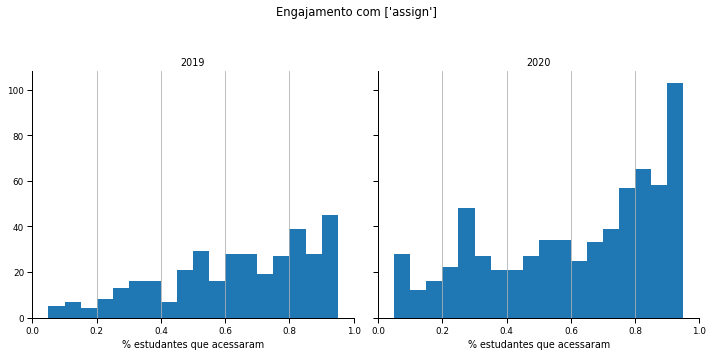

In [170]:
sns.set_context('paper',font_scale=1)
modname = ['assign'];
data = filterviews(mvfmrp,modname)

g = sns.FacetGrid(data=data,col='ano',height=5)
g.map(engagefig,'fracstudents')
g.set_xlabels("% estudantes que acessaram")
g.fig.suptitle("Engajamento com {}".format(modname))
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.8)

In [179]:
filterviews(fmrp20).query("name == 'assign'")['fracstudents'].mean()

0.8218728486783591

Embaixo, mostramos três indicadores de engajamento com os módulos no AVA:
1. `fracstudents` fração dos usuários que  visualizaram (acessaram) o módulo (pelo menos uma vez) / número de estudantes. Acho que esta métrica indica melhor se o módulo teve êxito em engajar a turma. Não consegue distinguir, porém, módulos com muitos acessos de módulos que todos acessarem, mas somente uma vez
1. `vpu` (views per uniques) é o número de acessos por usuário, dado que o usuário acessou
1. `vps` (views per student) é o numero de acessos por estudante, contantado também estudantes que não acessarem o módulo.

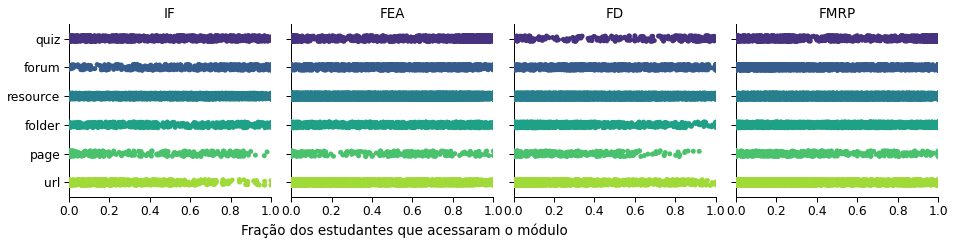

In [199]:
sns.set_context('paper',font_scale=1.4)
data=mv
#order = data.groupby('name')['vps'].median().sort_values(ascending=False).index
order = ['quiz','forum','resource','folder','page','url']
sns.set_palette('viridis')
g = sns.catplot(data=data,kind='strip',y='name',x='fracstudents',ci=False,height=10/3,order=order,col='unidade')
g.set_xlabels('Acessos (fração dos estudantes)')
g.set_ylabels('')
g.set_titles(template="{col_name}")
g.set_xlabels('')
g.set(xlim=(0,1))
plt.subplots_adjust(wspace=0.1)
ax = g.axes[0,1]
ax.text(-0.25,-0.22,"Fração dos estudantes que acessaram o módulo",transform=ax.transAxes);


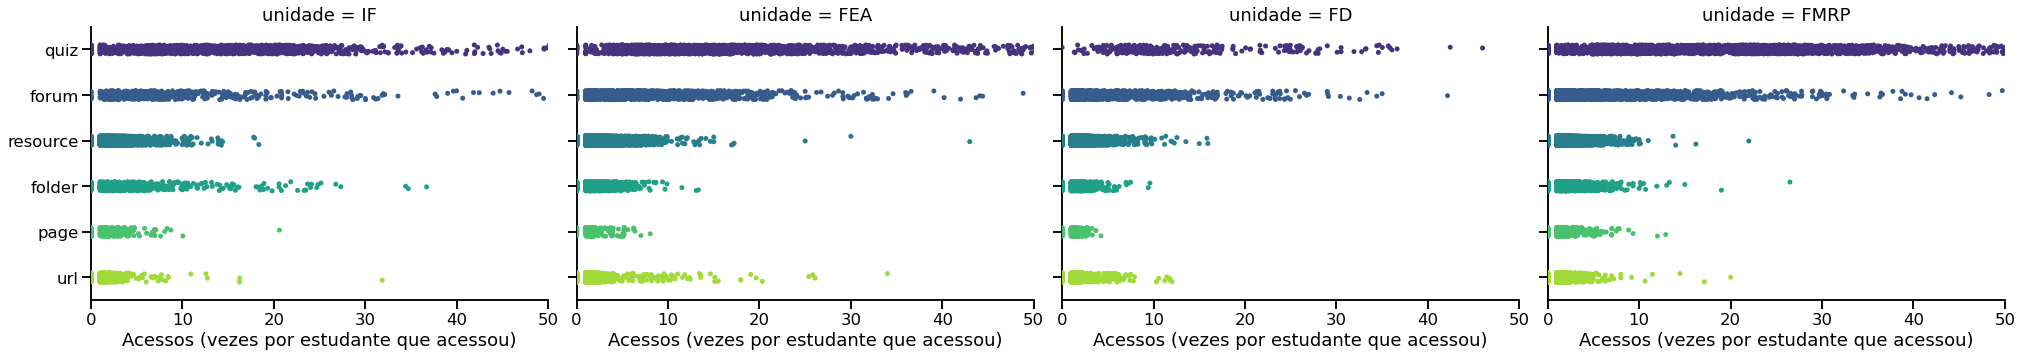

In [200]:
sns.set_context('talk')
data=mv
#order = data.groupby('name')['vps'].median().sort_values(ascending=False).index[:N]
order = ['quiz','forum','resource','folder','page','url']
g = sns.catplot(data=data,kind='strip',y='name',x='vpu',ci=False,height=5,aspect=np.sqrt(2),order=order,col='unidade')
g.set_xlabels('Acessos (vezes por estudante que acessou)')
g.set(xlim=(0,50))
g.set_ylabels('')

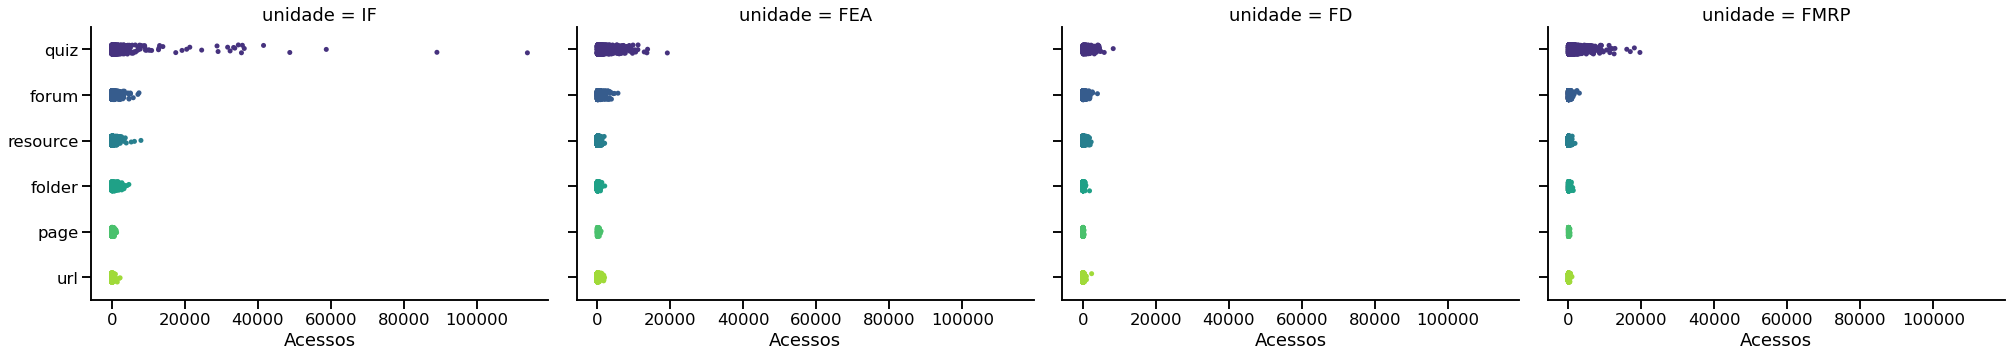

In [201]:
sns.set_context('talk')
data=mv
#order = data.groupby('name')['vps'].median().sort_values(ascending=False).index[:N]
order = ['quiz','forum','resource','folder','page','url']
g = sns.catplot(data=data,kind='strip',y='name',x='views',ci=False,height=5,aspect=np.sqrt(2),order=order,col='unidade')
g.set_xlabels('Acessos')
g.set_ylabels('')

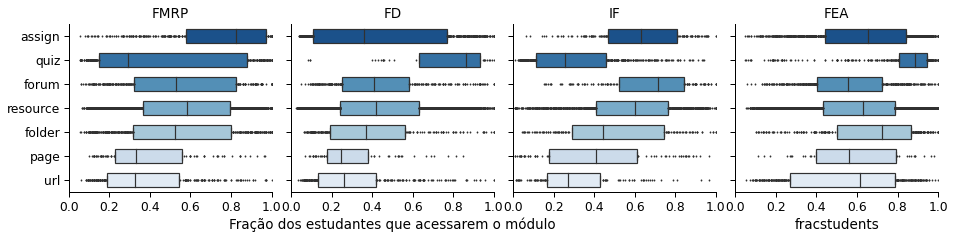

In [207]:
sns.set_context('paper',font_scale=1.4)
medians = data.groupby('unidade')['fracstudents'].median()
data = filterviews(mv[mv['ano'] == 2019])
data['unidade2'] = data['unidade'].map(lambda x: "{} ({:0.0f}%)".format(x,100*medians[x]))
col_order = ['FMRP','FD','IF','FEA']
#order = data.groupby('name')['ups'].median().sort_values(ascending=False).index[:N]
order = ['assign','quiz','forum','resource','folder','page','url']
g = sns.catplot(data=data,kind='box',y='name',x='fracstudents',col='unidade',height=10/3,whis=0,fliersize=1,width=0.6,order=order,col_order=col_order,palette='Blues_r')
labels = ['','Fração dos estudantes que acessarem o módulo','']
for ax,label in zip(g.fig.axes,labels):
    ax.set_xlabel(label)
g.set(xlim=(0,1))
g.set_titles("{col_name}")
g.set_ylabels('')
g.fig.suptitle('')
plt.subplots_adjust(top=0.85)